In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.holtwinters import ExponentialSmoothing 
import statsmodels.graphics.tsaplots as tsa_plots
from sklearn.metrics import mean_squared_error
from math import sqrt
import warnings

In [61]:
warnings.filterwarnings("ignore")
co2data = pd.read_csv("co2dataset.csv")
co2data

,Year,CO2
0,1800,0.00568
1,1801,0.00561
2,1802,0.00555
3,1803,0.00548
4,1804,0.00542
...,...,...
210,2010,15.60000
211,2011,15.60000
212,2012,14.80000
213,2013,14.70000


In [63]:
# converting string data to datetime
co2data['Year'] = pd.to_datetime(co2data['Year'],format='%Y', errors='ignore')
co2data = co2data.set_index('Year')
co2data.head()

,CO2
Year,
1800-01-01,0.00568
1801-01-01,0.00561
1802-01-01,0.00555
1803-01-01,0.00548
1804-01-01,0.00542


In [15]:
co2data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 215 entries, 1800-01-01 to 2014-01-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   CO2     215 non-null    float64
dtypes: float64(1)
memory usage: 3.4 KB


<Axes: xlabel='Year', ylabel='CO2'>

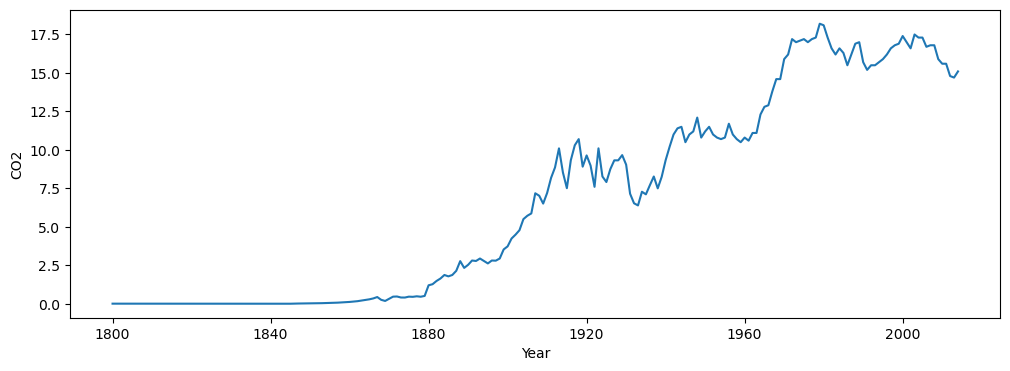

In [17]:
plt.figure(figsize=(12,4))
sns.lineplot(x='Year', y= 'CO2', data = co2data)

array([[<Axes: title={'center': 'CO2'}>]], dtype=object)

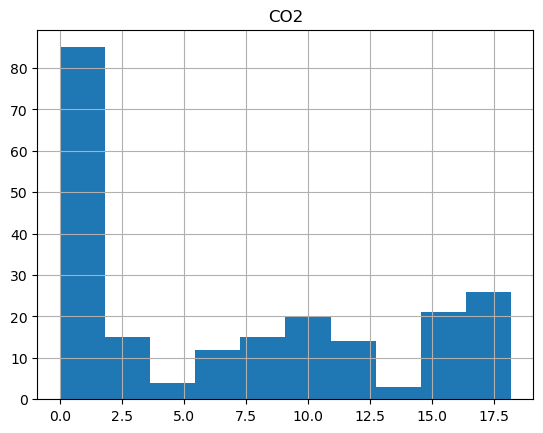

In [19]:
co2data.hist()

<Axes: ylabel='Density'>

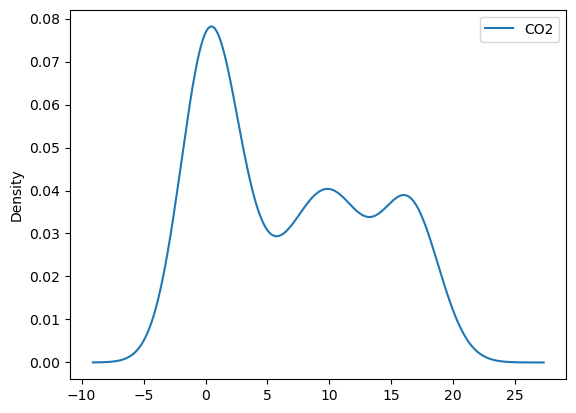

In [21]:
co2data.plot(kind='kde')

In [25]:
#Jarque Bera Stastical Test for Normality
from scipy.stats import jarque_bera as jb
is_norm=jb(co2data["CO2"])[1]
print(f"p value:{is_norm.round(2)}", ", Series is Normal" if is_norm >0.05 else ", Series is Non-Normal")

p value:0.0 , Series is Non-Normal


In [27]:
co2data1 = co2data[70:]
co2data1

,CO2
Year,
1870-01-01,0.321
1871-01-01,0.461
1872-01-01,0.471
1873-01-01,0.406
1874-01-01,0.404
...,...
2010-01-01,15.600
2011-01-01,15.600
2012-01-01,14.800


<Axes: xlabel='Year', ylabel='CO2'>

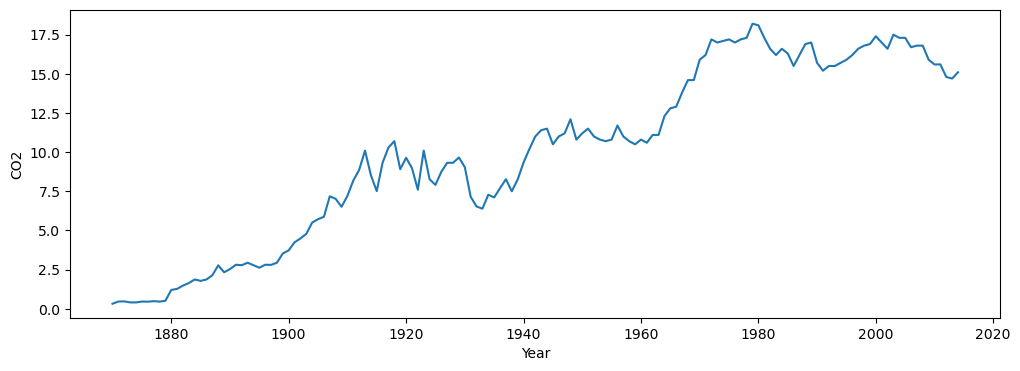

In [29]:
plt.figure(figsize=(12,4))
sns.lineplot(x='Year', y= 'CO2', data = co2data1)

array([[<Axes: title={'center': 'CO2'}>]], dtype=object)

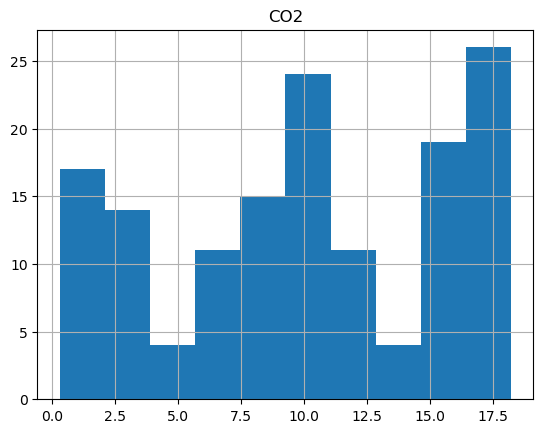

In [31]:
co2data1.hist()

<Axes: ylabel='Density'>

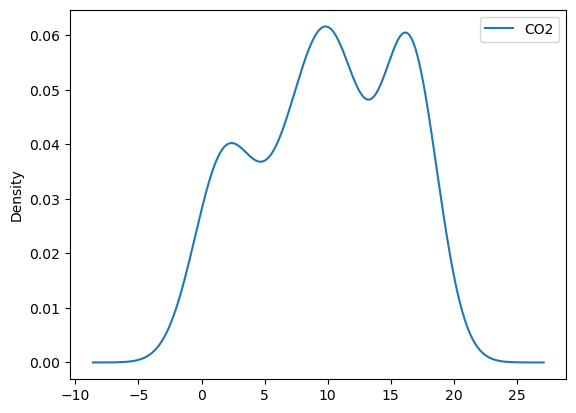

In [33]:
co2data1.plot(kind='kde')

In [13]:
#Jarque Bera Stastical Test for Normality
from scipy.stats import jarque_bera as jb
is_norm=jb(co2data1["CO2"])[1]
print(f"p value:{is_norm.round(2)}", ", Series is Normal" if is_norm >0.05 else ", Series is Non-Normal")

p value:0.01 , Series is Non-Normal


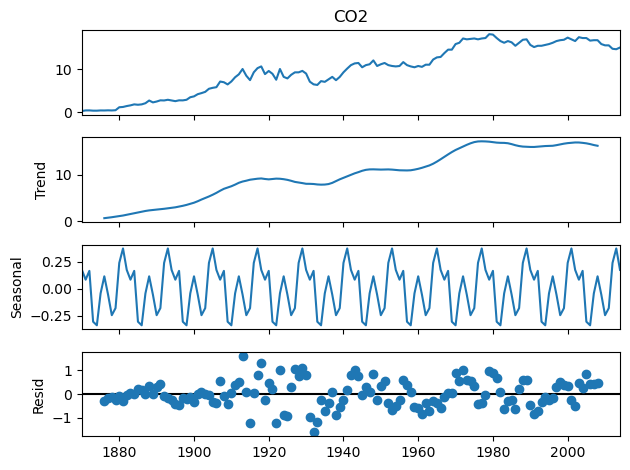

In [35]:
decompose_ts_add = seasonal_decompose(co2data1.CO2,period=12)
decompose_ts_add.plot()
plt.show()

## Holt-Winter Method

In [37]:
#Train, Test split
train = co2data1[:100]
test = co2data1[100:]

In [39]:
hwe_model1 = ExponentialSmoothing(train["CO2"],seasonal="add",trend="add",seasonal_periods=29).fit() 
pred = hwe_model1.predict(start = test.index[0],end = test.index[-1])
pred1 = pd.DataFrame(pred, index = pred.index)
pred_test_hw = pred1
rmse = sqrt(mean_squared_error(test.values, pred1))
mape = np.mean(np.abs(test.values - pred1)/np.abs(test.values))
print("RMSE: ", rmse, "MAPE: ", mape)

RMSE:  2.4228155846213077 MAPE:  0.12012547435156894


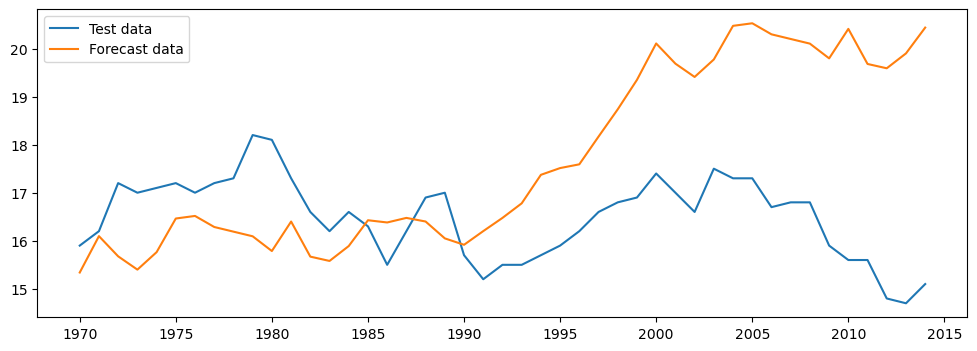

In [41]:
# Plot the data
# Comparison of test data with predicted values
plt.figure(figsize=(12, 4))
plt.plot(test["CO2"], label = "Test data")
plt.plot(pred1, label = "Forecast data")
plt.legend()

In [43]:
# Comparison with train data
hwe_model2 = ExponentialSmoothing(train["CO2"],seasonal="add",trend="add",seasonal_periods=29).fit() 
pred = hwe_model2.predict(start = train.index[0],end = train.index[-1])
pred2 = pd.DataFrame(pred, index = pred.index)
rmse = sqrt(mean_squared_error(train.values, pred2))
mape = np.mean(np.abs(train.values - abs(pred2.values))/np.abs(train.values))
print("RMSE: ", rmse, "MAPE: ", mape)

RMSE:  0.5867910100779218 MAPE:  0.1384379729095317


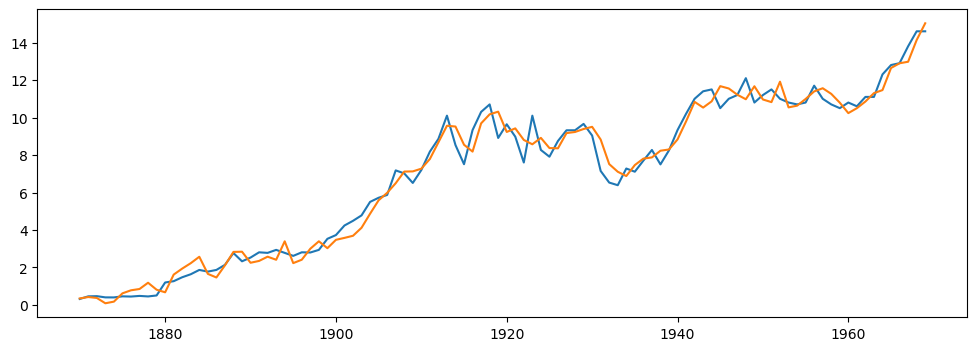

In [45]:
# Plot the data
# Comparison of train data with predicted values
plt.figure(figsize=(12, 4))
plt.plot(train["CO2"])
plt.plot(pred2)

In [47]:
hwe_model3 = ExponentialSmoothing(train["CO2"],seasonal="add",trend="add",seasonal_periods=29).fit() 
pred = hwe_model3.predict(start = co2data1.index[0],end = co2data1.index[-1])
pred3 = pd.DataFrame(pred, index = pred.index)
rmse = sqrt(mean_squared_error(co2data1.values, pred3))
mape = np.mean(np.abs(co2data1.values - pred3)/np.abs(co2data1.values))
print("RMSE: ", rmse, "MAPE: ", mape)

RMSE:  1.4349911930994963 MAPE:  0.13275478370188806


<function matplotlib.pyplot.plot(*args: 'float | ArrayLike | str', scalex: 'bool' = True, scaley: 'bool' = True, data=None, **kwargs) -> 'list[Line2D]'>

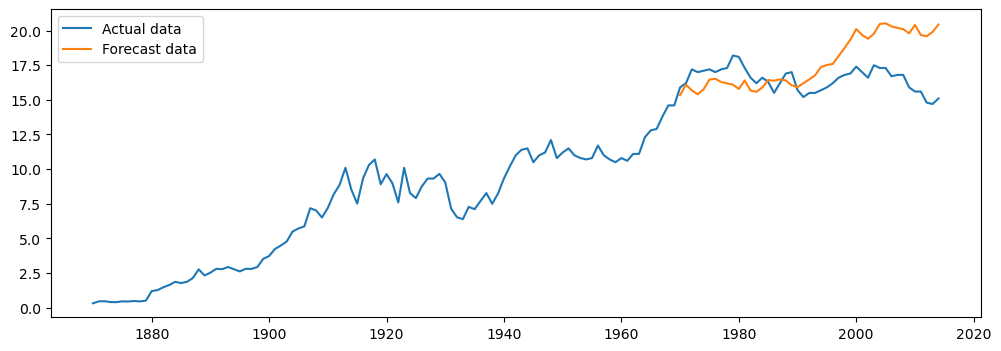

In [49]:
# Plot the data
# Comparison of all data with predicted values
plt.figure(figsize=(12, 4))
plt.plot(co2data1["CO2"], label = "Actual data")
plt.plot(pred1, label ="Forecast data")
plt.legend()
plt.plot

<Axes: >

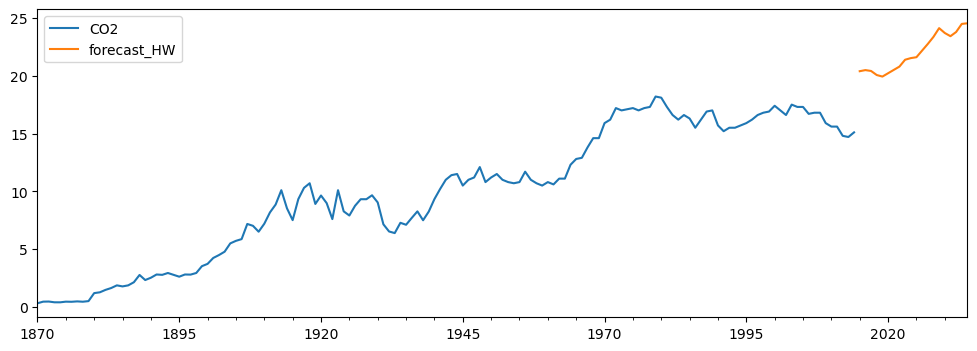

In [51]:
df1 = co2data1
from pandas.tseries.offsets import DateOffset
future_dates=[df1.index[-1]+ DateOffset(years=x)for x in range(0,21)]
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df1.columns)

future_datest_df.tail()

future_df_HW=pd.concat([df1,future_datest_df])

future_df_HW['forecast_HW'] = hwe_model3.predict(start = future_df_HW.index[145], end = 165)
future_df_HW[['CO2', 'forecast_HW']].plot(figsize=(12, 4))


RMSE:  0.5680425529243597 MAPE:  0.09436678059754393


<Axes: >

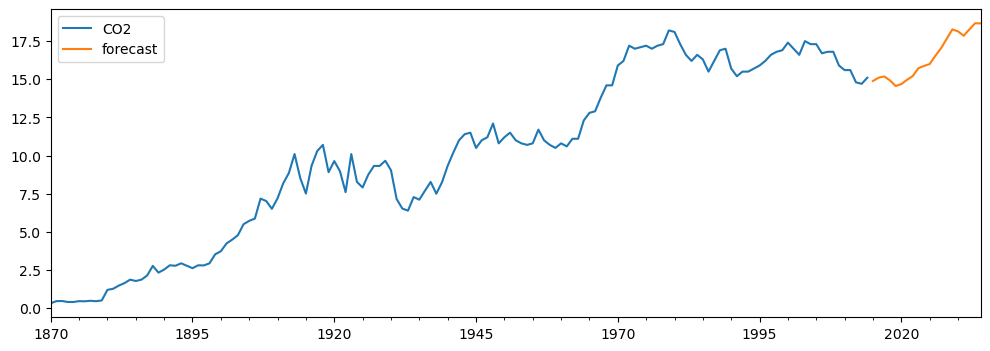

In [53]:
hwe_model3 = ExponentialSmoothing(co2data1["CO2"],seasonal="add",trend="add",seasonal_periods=29).fit() 
pred = hwe_model3.predict(start = co2data1.index[0],end = co2data1.index[-1])
pred3 = pd.DataFrame(pred, index = pred.index)
rmse = sqrt(mean_squared_error(co2data1.values, pred3))
mape = np.mean(np.abs(co2data1.values - pred3)/np.abs(co2data1.values))
print("RMSE: ", rmse, "MAPE: ", mape)

df1 = co2data1
from pandas.tseries.offsets import DateOffset
future_dates=[df1.index[-1]+ DateOffset(years=x)for x in range(0,21)]
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df1.columns)

future_datest_df.tail()

future_df_HW_all=pd.concat([df1,future_datest_df])

future_df_HW_all['forecast'] = hwe_model3.predict(start = future_df_HW_all.index[145], end = 165)
future_df_HW_all[['CO2', 'forecast']].plot(figsize=(12, 4))

In [55]:
import pickle 
pickle_out = open("HW_model.pkl", mode = "wb") 
pickle.dump(hwe_model3, pickle_out) 
pickle_out.close()